In [ ]:
import numpy as np
import pandas as pd
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
path = r"/content/drive/My Drive/LDA"

In [ ]:
import os

In [ ]:
dpath=os.listdir(path)

In [ ]:
dirname=dpath[0]

In [ ]:
dirname =[]
for i in range(0,len(dpath)):
  dirname.append(path + '/' + dpath[i])

In [ ]:
dirname

['/content/drive/My Drive/LDA/0.csv',
 '/content/drive/My Drive/LDA/TechCrunch1.csv',
 '/content/drive/My Drive/LDA/plotdata.csv',
 '/content/drive/My Drive/LDA/1.csv',
 '/content/drive/My Drive/LDA/2.csv',
 '/content/drive/My Drive/LDA/3.csv',
 '/content/drive/My Drive/LDA/4.csv']

In [ ]:
data=dirname[1]

In [ ]:
df = pd.read_csv(data,encoding='latin1')
df

,title,url,date
0,Gaming firm Razer seeks to raise over $600M in...,https://techcrunch.com/2017/07/01/razer-hong-k...,2017-07-01
1,Mendel.ai nabs $2 million to match cancer pati...,https://techcrunch.com/2017/07/01/mendel-ai-na...,2017-07-01
2,These cities in Californias East Bay are raki...,https://techcrunch.com/2017/07/01/these-east-b...,2017-07-01
3,A walk around Station F with Emmanuel Macron,https://techcrunch.com/2017/07/01/a-walk-aroun...,2017-07-01
4,Crunch Report | Facebook Helps You Find Wi-Fi,https://techcrunch.com/2017/06/30/crunch-repor...,2017-06-30
...,...,...,...
12389,The League brings its picky dating app to Android,https://techcrunch.com/2017/01/26/the-league-b...,2017-01-26
12390,More than 3M businesses now pay for Googles G...,https://techcrunch.com/2017/01/26/more-than-3m...,2017-01-26
12391,"With New Zealand citizenship, Peter Thiel can ...",https://techcrunch.com/2017/01/26/peter-thiel-...,2017-01-26
12392,H2Os Deep Water puts deep learning in the han...,https://techcrunch.com/2017/01/26/h2os-deep-wa...,2017-01-26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   12394 non-null  object
 1   url     12394 non-null  object
 2   date    12394 non-null  object
dtypes: object(3)
memory usage: 290.6+ KB


In [ ]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   12394 non-null  object        
 1   url     12394 non-null  object        
 2   date    12377 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 290.6+ KB


In [ ]:
df.head()

,title,url,date
0,Gaming firm Razer seeks to raise over $600M in...,https://techcrunch.com/2017/07/01/razer-hong-k...,2017-07-01
1,Mendel.ai nabs $2 million to match cancer pati...,https://techcrunch.com/2017/07/01/mendel-ai-na...,2017-07-01
2,These cities in Californias East Bay are raki...,https://techcrunch.com/2017/07/01/these-east-b...,2017-07-01
3,A walk around Station F with Emmanuel Macron,https://techcrunch.com/2017/07/01/a-walk-aroun...,2017-07-01
4,Crunch Report | Facebook Helps You Find Wi-Fi,https://techcrunch.com/2017/06/30/crunch-repor...,2017-06-30


In [ ]:
idx = df[df['date'].isnull()].index
idx

Int64Index([6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070,
            6071, 6072, 6073, 6074, 6075, 6076],
           dtype='int64')

In [ ]:
df.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["million","raises","startup","funds","ceo","billion","startups","funding","york","billions"])
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=my_stop_words)
doc_term_matrix = tfidf_vect.fit_transform(df['title'].values.astype('U'))

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

recruiting
kobo
ebook
200m
eric
nonprofits
bash
pleads
fine
miami


In [ ]:

first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

car
cars
microsoft
ai
fund
uber
self
driving
tech
new


In [ ]:
sec_topic = nmf.components_[1]
top_topic_words1 = sec_topic.argsort()[-40:]

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

car
cars
microsoft
ai
fund
uber
self
driving
tech
new


In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['car', 'cars', 'microsoft', 'ai', 'fund', 'uber', 'self', 'driving', 'tech', 'new']


Top 10 words for topic #1:
['apple', 'waymo', 'spacex', 'lyft', 'diversity', 'buys', 'tesla', 'uber', 'crunch', 'report']


Top 10 words for topic #2:
['day', 'watch', 'techcrunch', 'battlefield', 'tickets', 'ny', '2017', 'sf', 'berlin', 'disrupt']


Top 10 words for topic #3:
['maps', 'pixel', 'assistant', 'search', 'launches', 'ai', 'android', 'home', 'cloud', 'google']


Top 10 words for topic #4:
['watch', 'video', 'launches', 'service', 'tv', 'live', 'amazon', 'facebook', 'apple', 'app']




In [ ]:
topic_values = nmf.transform(doc_term_matrix)
df['Topic_nmf'] = topic_values.argmax(axis=1)
df.head()

,title,url,date,Topic_nmf
0,Gaming firm Razer seeks to raise over $600M in...,https://techcrunch.com/2017/07/01/razer-hong-k...,2017-07-01,4
1,Mendel.ai nabs $2 million to match cancer pati...,https://techcrunch.com/2017/07/01/mendel-ai-na...,2017-07-01,3
2,These cities in Californias East Bay are raki...,https://techcrunch.com/2017/07/01/these-east-b...,2017-07-01,0
3,A walk around Station F with Emmanuel Macron,https://techcrunch.com/2017/07/01/a-walk-aroun...,2017-07-01,0
4,Crunch Report | Facebook Helps You Find Wi-Fi,https://techcrunch.com/2017/06/30/crunch-repor...,2017-06-30,1


In [ ]:
df['Topic_nmf'].value_counts() 

4    6108
0    2940
3    1844
2     953
1     532
Name: Topic_nmf, dtype: int64

In [ ]:
df['MONTHLY'] = df['date'].map(lambda x: '{year}-{month}'.format(year=x.year,
                                                              month=x.month,
                                                              day=x.day))

In [ ]:
df.head()

,title,url,date,Topic_nmf,MONTHLY
0,Gaming firm Razer seeks to raise over $600M in...,https://techcrunch.com/2017/07/01/razer-hong-k...,2017-07-01,4,2017-7
1,Mendel.ai nabs $2 million to match cancer pati...,https://techcrunch.com/2017/07/01/mendel-ai-na...,2017-07-01,3,2017-7
2,These cities in Californias East Bay are raki...,https://techcrunch.com/2017/07/01/these-east-b...,2017-07-01,0,2017-7
3,A walk around Station F with Emmanuel Macron,https://techcrunch.com/2017/07/01/a-walk-aroun...,2017-07-01,0,2017-7
4,Crunch Report | Facebook Helps You Find Wi-Fi,https://techcrunch.com/2017/06/30/crunch-repor...,2017-06-30,1,2017-6


In [ ]:
from google.colab import files

In [ ]:
data=df.to_csv("plotdata.csv")
files.download("plotdata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
a = df.groupby(['Topic_nmf','MONTHLY']).size()

In [ ]:
a

Topic_nmf  MONTHLY
0          2017-1     301
           2017-10    252
           2017-11    216
           2017-12     65
           2017-2     248
           2017-3     252
           2017-4     264
           2017-5     265
           2017-6     257
           2017-7     238
           2017-8     294
           2017-9     288
1          2017-1      51
           2017-10     45
           2017-11     50
           2017-12      4
           2017-2      44
           2017-3      57
           2017-4      47
           2017-5      40
           2017-6      54
           2017-7      43
           2017-8      56
           2017-9      41
2          2017-1      99
           2017-10     63
           2017-11     80
           2017-12     24
           2017-2      84
           2017-3      77
           2017-4      84
           2017-5      81
           2017-6      84
           2017-7      76
           2017-8      93
           2017-9     108
3          2017-1     196
           2017-10 

In [ ]:
a.dropna()

Topic_nmf  MONTHLY
0          2017-1     301
           2017-10    252
           2017-11    216
           2017-12     65
           2017-2     248
           2017-3     252
           2017-4     264
           2017-5     265
           2017-6     257
           2017-7     238
           2017-8     294
           2017-9     288
1          2017-1      51
           2017-10     45
           2017-11     50
           2017-12      4
           2017-2      44
           2017-3      57
           2017-4      47
           2017-5      40
           2017-6      54
           2017-7      43
           2017-8      56
           2017-9      41
2          2017-1      99
           2017-10     63
           2017-11     80
           2017-12     24
           2017-2      84
           2017-3      77
           2017-4      84
           2017-5      81
           2017-6      84
           2017-7      76
           2017-8      93
           2017-9     108
3          2017-1     196
           2017-10 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [ ]:
a.head()

Topic_nmf  MONTHLY
0          2017-1     301
           2017-10    252
           2017-11    216
           2017-12     65
           2017-2     248
dtype: int64

In [ ]:
x=a.to_csv('abc.csv')

In [ ]:
from google.colab import files
files.download('abc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRY

In [ ]:
zero=pd.read_csv(dirname[0])

In [ ]:
zero['DATE']=pd.to_datetime(zero['DATE'])

In [ ]:
zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    12 non-null     datetime64[ns]
 1   Freq    12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 320.0 bytes


In [ ]:
zero.head()

,DATE,Freq
0,2017-01-01,298
1,2017-02-01,246
2,2017-03-01,250
3,2017-04-01,263
4,2017-05-01,264


In [ ]:
series = pd.read_csv(dirname[0], \
                     header=0, \
                     parse_dates=[0], \
                     index_col=0, \
                     squeeze=True, \
)

In [ ]:
series

DATE
2017-01-01    298
2017-02-01    246
2017-03-01    250
2017-04-01    263
2017-05-01    264
2017-06-01    257
2017-07-01    235
2017-08-01    293
2017-09-01    283
2017-10-01    251
2017-11-01    212
2017-12-01     65
Name: Freq, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

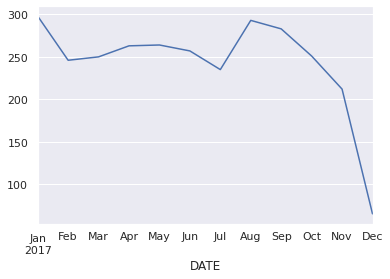

In [ ]:
series.plot()
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
X = series.values
train, test = X[0:9], X[9:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%d, expected=%d' % (yhat, obs))

predicted=287, expected=251
predicted=255, expected=212
predicted=205, expected=65


In [ ]:
predyear = model_fit.forecast(steps=1)[0]

In [ ]:
print(predyear.astype(int))

[522]


In [ ]:
mape = np.mean(np.abs(yhat - obs)/np.abs(yhat))

In [ ]:
mape

0.1461732422466438

In [ ]:
pred1 = model_fit.forecast(steps=1)[0]

In [ ]:
print(pred1.astype(int))

[522]


In [ ]:
pred3 = model_fit.forecast(steps=3)[0]

In [ ]:
pred3.astype(int)

array([522, 529, 518])

In [ ]:
pred12 = model_fit.forecast(steps=12)[0]

In [ ]:
pred12.astype(int)

array([522, 529, 518, 514, 508, 502, 497, 491, 485, 479, 474, 468])

PLOT

Graph

In [ ]:
plotdata=pd.read_csv(dirname[2])

In [ ]:
plotdata.head()

,date,Topic,Topic_nmf,MONTHLY,INTERVAL_15,quarter
0,1/1/2017,5.0,4.0,2017-1,1/15/2017,Q1
1,1/1/2017,3.0,4.0,2017-1,1/15/2017,Q1
2,1/1/2017,2.0,2.0,2017-1,1/15/2017,Q1
3,1/1/2017,2.0,0.0,2017-1,1/15/2017,Q1
4,1/1/2017,2.0,4.0,2017-1,1/15/2017,Q1


In [ ]:
import seaborn as sns

In [ ]:
sns.set_theme(style="darkgrid")

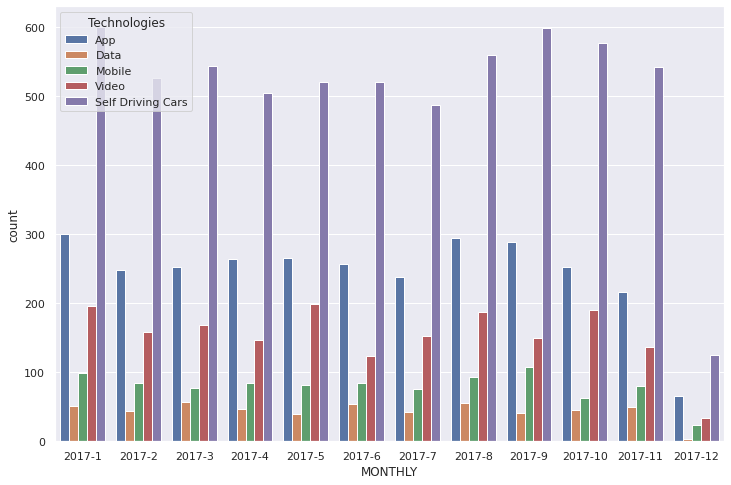

In [ ]:
fig=plt.figure(figsize=(12,8))
ax = sns.countplot(x="MONTHLY",hue="Topic_nmf" ,data=plotdata)
plt.legend(title='Technologies', loc='upper left', labels=['App', 'Data','Mobile','Video','Self Driving Cars'])
plt.show()

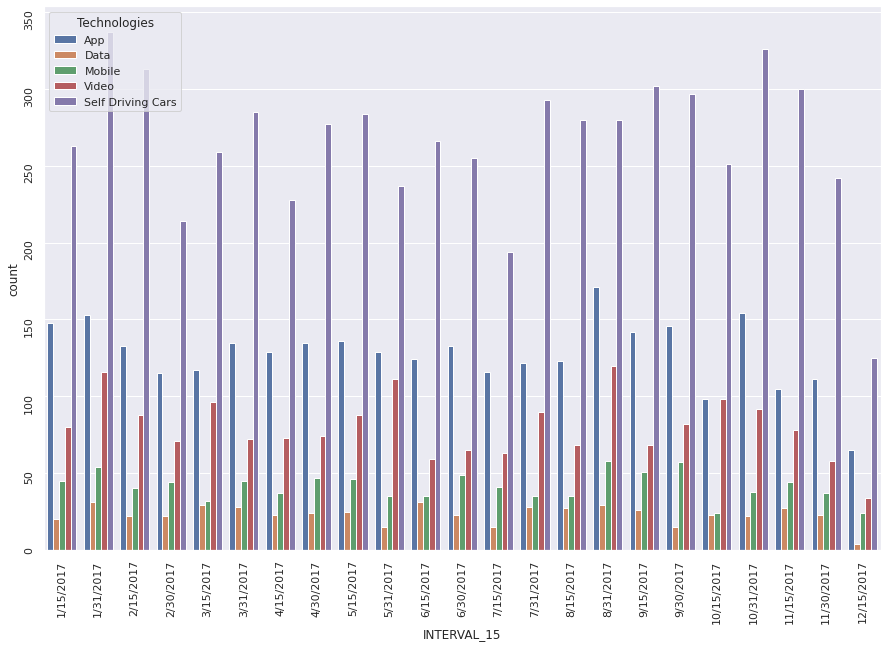

In [ ]:
fig=plt.figure(figsize=(15,10))
ax1 = sns.countplot(x="INTERVAL_15",hue="Topic_nmf" ,data=plotdata)
ax1.tick_params(direction='out',labelrotation=90)
plt.legend(title='Technologies', loc='upper left', labels=['App', 'Data','Mobile','Video','Self Driving Cars'])
plt.show()

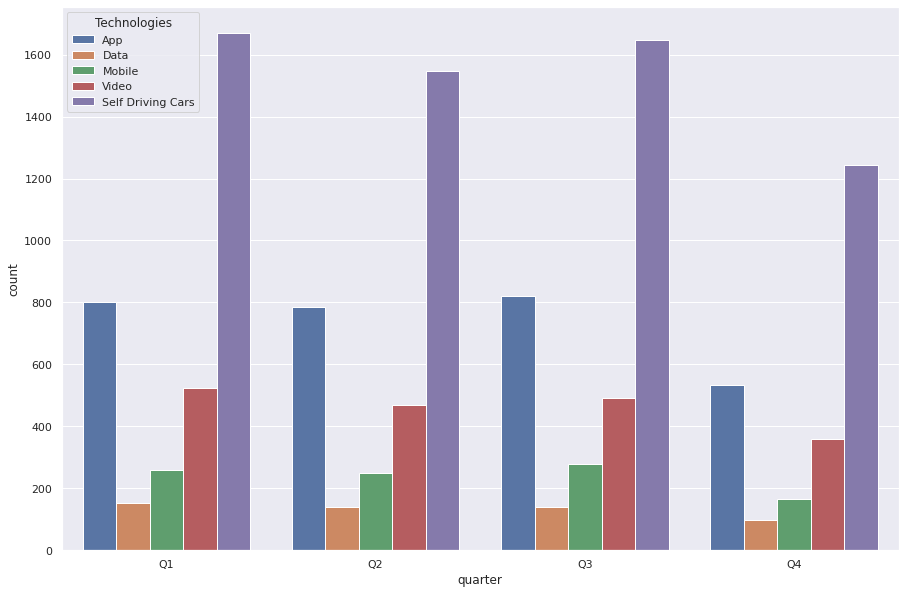

In [ ]:
fig=plt.figure(figsize=(15,10))
ax2 = sns.countplot(x="quarter",hue="Topic_nmf" ,data=plotdata)
plt.legend(title='Technologies', loc='upper left', labels=['App', 'Data','Mobile','Video','Self Driving Cars'])
plt.show()